In [1]:
!pip install "opencv-python-headless<4.3"
!pip install cellpose

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 MB 10.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.23 requires opencv-python-headless>=4.9.0.80, but you have opencv-python-headless 3.4.18.65 which is incompatible.
albumentations 2.0.5 requires opencv-python-headless>=4.9.0.80, but you have opencv-python-headless 3.4.18.65 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.9/225.9 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [2]:
# Uninstall conflicting packages
!pip uninstall -y numpy opencv-python-headless cellpose

# Install compatible numpy version
!pip install numpy==1.24.3

# Install compatible opencv version
!pip install opencv-python-headless==4.8.0.74

# Reinstall cellpose
!pip install cellpose

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: opencv-python-headless 3.4.18.65
Uninstalling opencv-python-headless-3.4.18.65:
  Successfully uninstalled opencv-python-headless-3.4.18.65
Found existing installation: cellpose 3.1.1.1
Uninstalling cellpose-3.1.1.1:
  Successfully uninstalled cellpose-3.1.1.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 44.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.23 requires opencv-python-headless>=4.9.0.80, which is not installed.
albumentations 2.0.5 requires opencv-python-headless>=4.9.0.80, which is not installed.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
pymc 5.21

Reason for being yanked: deprecated, use 4.8.0.76
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.23 requires opencv-python-headless>=4.9.0.80, but you have opencv-python-headless 4.8.0.74 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.5 requires opencv-python-headless>=4.9.0.80, but you have opencv-python-headless 4.8.0.74 which is incompatible.
  Using cached cellpose-3.1.1.1-py3-none-any.whl.metadata (22 kB)
Using cached cellpose-3.1.1.1-py3-none-any.whl (225 kB)


In [1]:
!nvcc --version
!nvidia-smi

import os, shutil
import numpy as np
import matplotlib.pyplot as plt
from cellpose import core, utils, io, models, metrics
from glob import glob

use_GPU = core.use_gpu()
yn = ['NO', 'YES']
print(f'>>> GPU activated? {yn[use_GPU]}')

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
Wed Apr  9 07:14:42 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8       

In [15]:
import numpy as np
import tifffile
from cellpose import models
import os
import glob
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define input and output paths
input_dir = '/content/drive/MyDrive/knowledge/University/Master/Thesis/Projected/1.4Pa-x40/Nuclei/background'
output_dir = '/content/drive/MyDrive/knowledge/University/Master/Thesis/Segmented/1.4Pa-x40/Nuclei'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Define Cellpose parameters
model_type = 'cyto3'  # Using cyto3 model for nuclei
channels = [0, 0]     # Single channel mode (no nuclear channel needed since entire image is nuclei)
diameter = 30         # Approximate size of nuclei
cellprob_threshold = 0.0  # Threshold for cell probability
flow_threshold = 0.4      # Threshold for flows
resample = False      # Don't resample dynamics
do_3D = False         # 2D processing
stitch_threshold = 0  # No stitching needed for 2D

# Create Cellpose model
print("Creating Cellpose model...")
CP = models.CellposeModel(model_type=model_type, gpu=True)

# Find all .tif files in the input directory
input_files = glob.glob(os.path.join(input_dir, '*.tif'))
print(f"Found {len(input_files)} .tif files to process")

# Process each file
for input_file in input_files:
    # Get base filename for output
    filename = os.path.basename(input_file)
    base_name = os.path.splitext(filename)[0]
    output_file = os.path.join(output_dir, f"{base_name}_mask.tif")

    print(f"Processing: {filename}")

    # Load the image
    img = tifffile.imread(input_file)
    print(f"  Image shape: {img.shape}")

    # For 2D single-channel images, add dimensions to match what Cellpose expects
    if len(img.shape) == 2:
        # This is a 2D single-channel image (H, W)
        image = img[np.newaxis, ..., np.newaxis]  # Add z and channel dimensions (z, y, x, c)
    else:
        raise ValueError(f"Unexpected image shape: {img.shape}. Expected 2D image with shape (H, W).")

    # Run segmentation
    print(f"  Running segmentation with diameter={diameter}, cellprob_threshold={cellprob_threshold}, flow_threshold={flow_threshold}")
    masks, flows, _ = CP.eval(image,
                              channels=channels,
                              diameter=diameter,
                              resample=resample,
                              cellprob_threshold=cellprob_threshold,
                              flow_threshold=flow_threshold,
                              do_3D=do_3D,
                              stitch_threshold=stitch_threshold)

    # Process the masks
    masks = masks.squeeze()  # Remove any extra dimensions
    print(f"  Segmentation complete. Found {len(np.unique(masks))-1} objects")

    # Save the masks
    tifffile.imwrite(output_file, masks.astype(np.uint32))
    print(f"  Saved masks to {output_file}")

print("All processing complete!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Creating Cellpose model...
Found 13 .tif files to process
Processing: denoised_1.4Pa_A1_19dec21_40x_L2RA_FlatA_seq001_Nuclei_regional.tif
  Image shape: (1024, 1024)
  Running segmentation with diameter=30, cellprob_threshold=0.0, flow_threshold=0.4
  Segmentation complete. Found 86 objects
  Saved masks to /content/drive/MyDrive/knowledge/University/Master/Thesis/Segmented/1.4Pa-x40/Nuclei/denoised_1.4Pa_A1_19dec21_40x_L2RA_FlatA_seq001_Nuclei_regional_mask.tif
Processing: denoised_1.4Pa_A1_19dec21_40x_L2RA_FlatA_seq002_Nuclei_regional.tif
  Image shape: (1024, 1024)
  Running segmentation with diameter=30, cellprob_threshold=0.0, flow_threshold=0.4
  Segmentation complete. Found 94 objects
  Saved masks to /content/drive/MyDrive/knowledge/University/Master/Thesis/Segmented/1.4Pa-x40/Nuclei/denoised_1.4Pa_A1_19dec21_40x_L2RA_FlatA_seq002_Nuclei_regional_mask

Found 13 mask files to analyze


Analyzing masks: 100%|██████████| 13/13 [00:01<00:00,  9.78it/s]



Summary Statistics:
              area  mean_intensity  max_intensity
count  1145.000000     1145.000000    1145.000000
mean   1539.005240    24735.411659   41856.370306
std     727.115638     6607.151524   10559.550975
min      30.000000     6642.459384    9902.000000
25%    1193.000000    20410.976813   34470.000000
50%    1408.000000    24329.422507   42134.000000
75%    1725.000000    29095.295341   49232.000000
max    6127.000000    53587.543438   65535.000000

Impact of Current Thresholds:

Threshold Analysis:
Max Intensity > 50300: 254 nuclei (22.18% of total)
Mean Intensity > 30000: 240 nuclei (20.96% of total)
Area < 100: 8 nuclei (0.70% of total)
Total nuclei removed: 316 (27.60% of total)

Percentile Analysis (useful for setting thresholds):
        area  mean_intensity  max_intensity
1%    150.44    10199.536590       17273.20
5%    439.60    13884.527113       23775.60
10%   762.00    16500.874403       28635.80
25%  1193.00    20410.976813       34470.00
50%  1408.00    

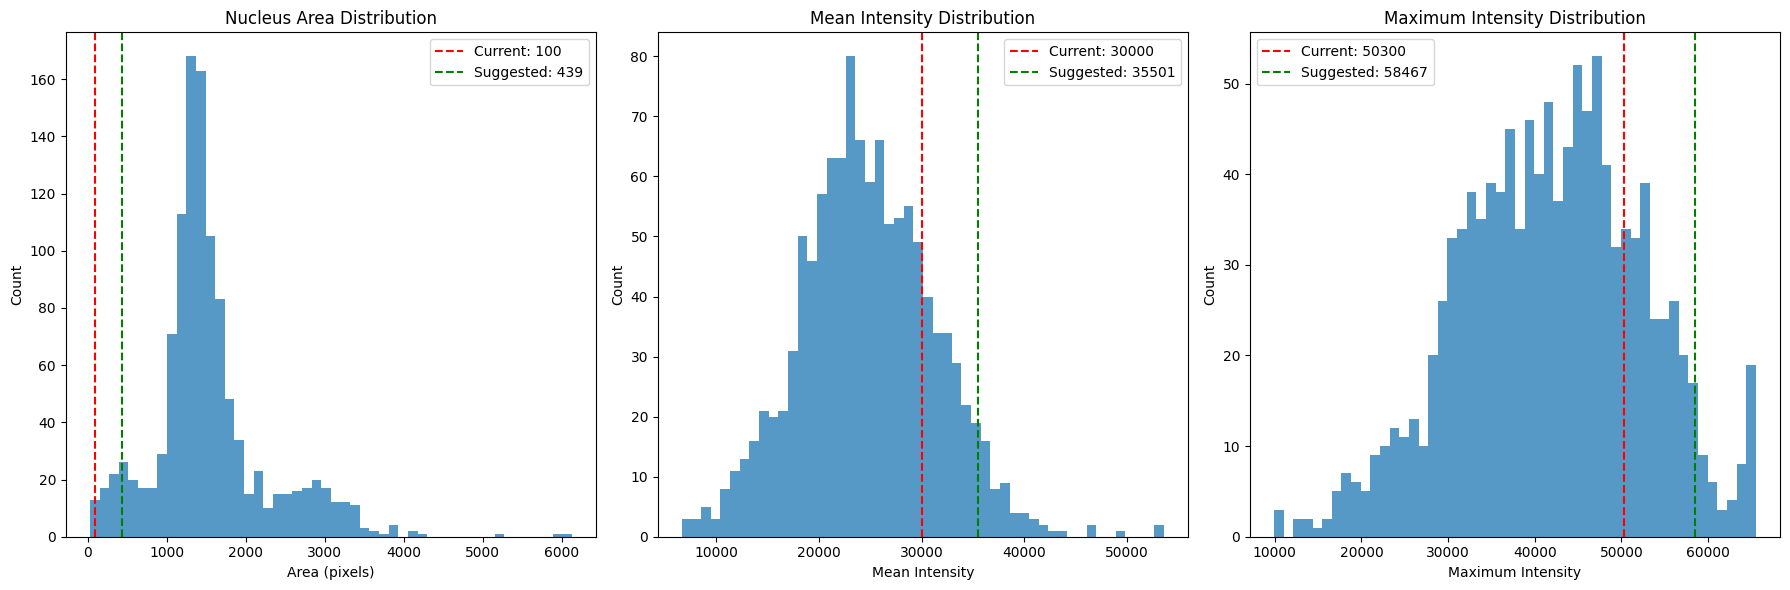

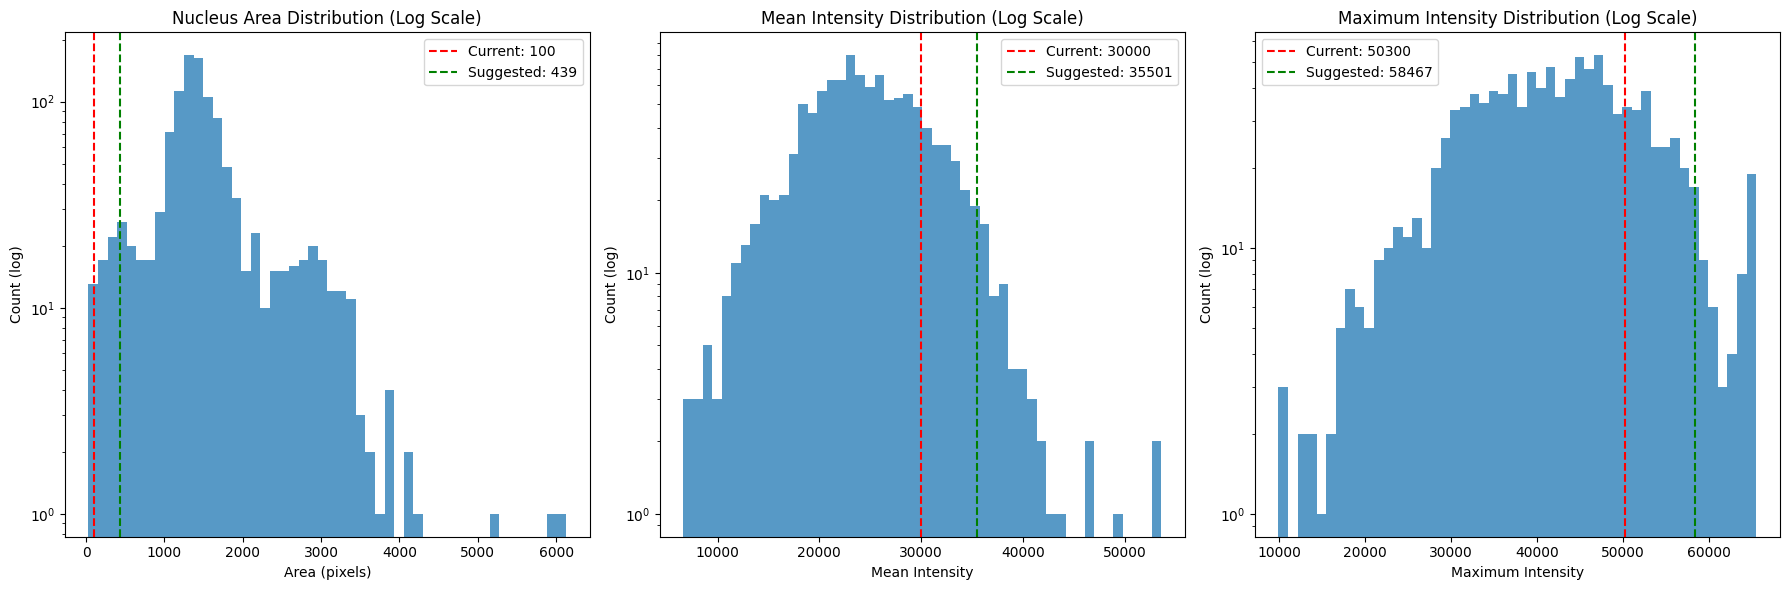

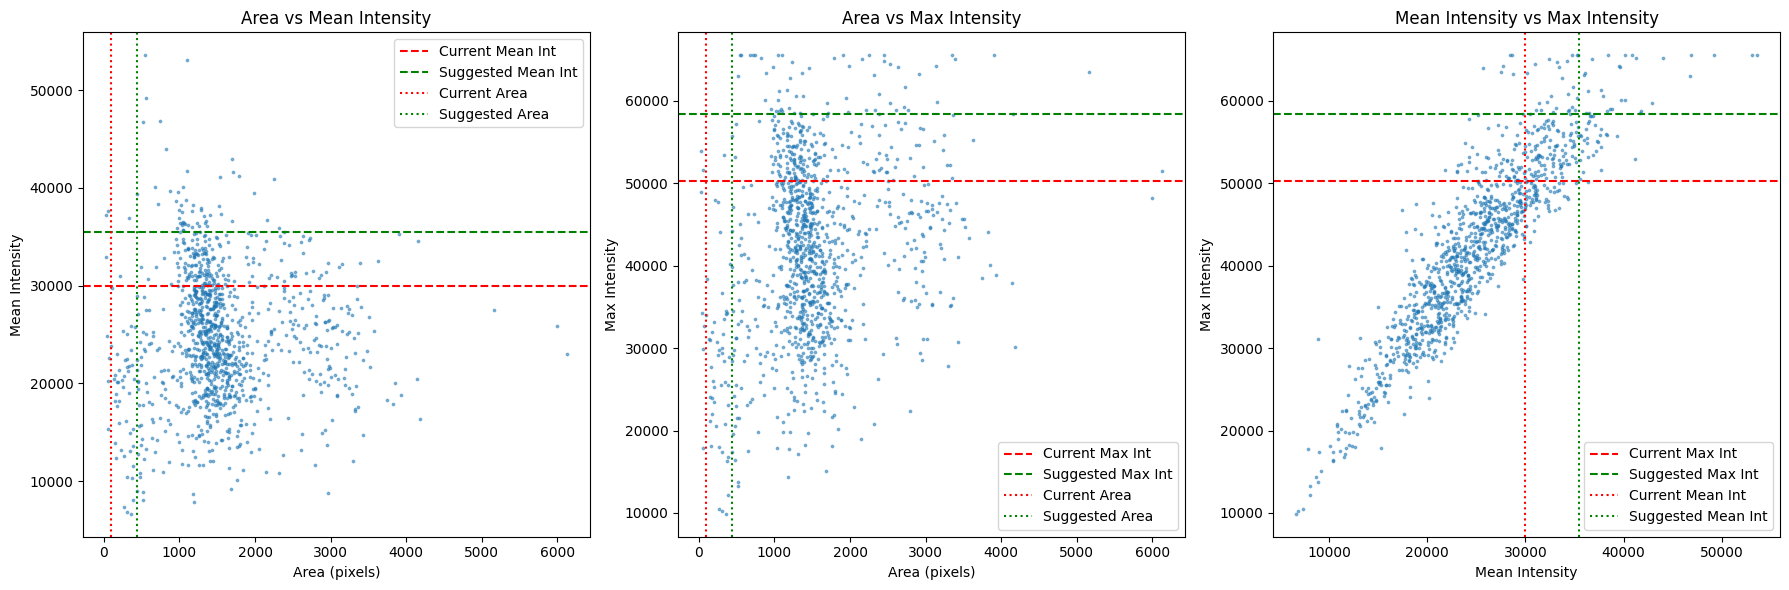

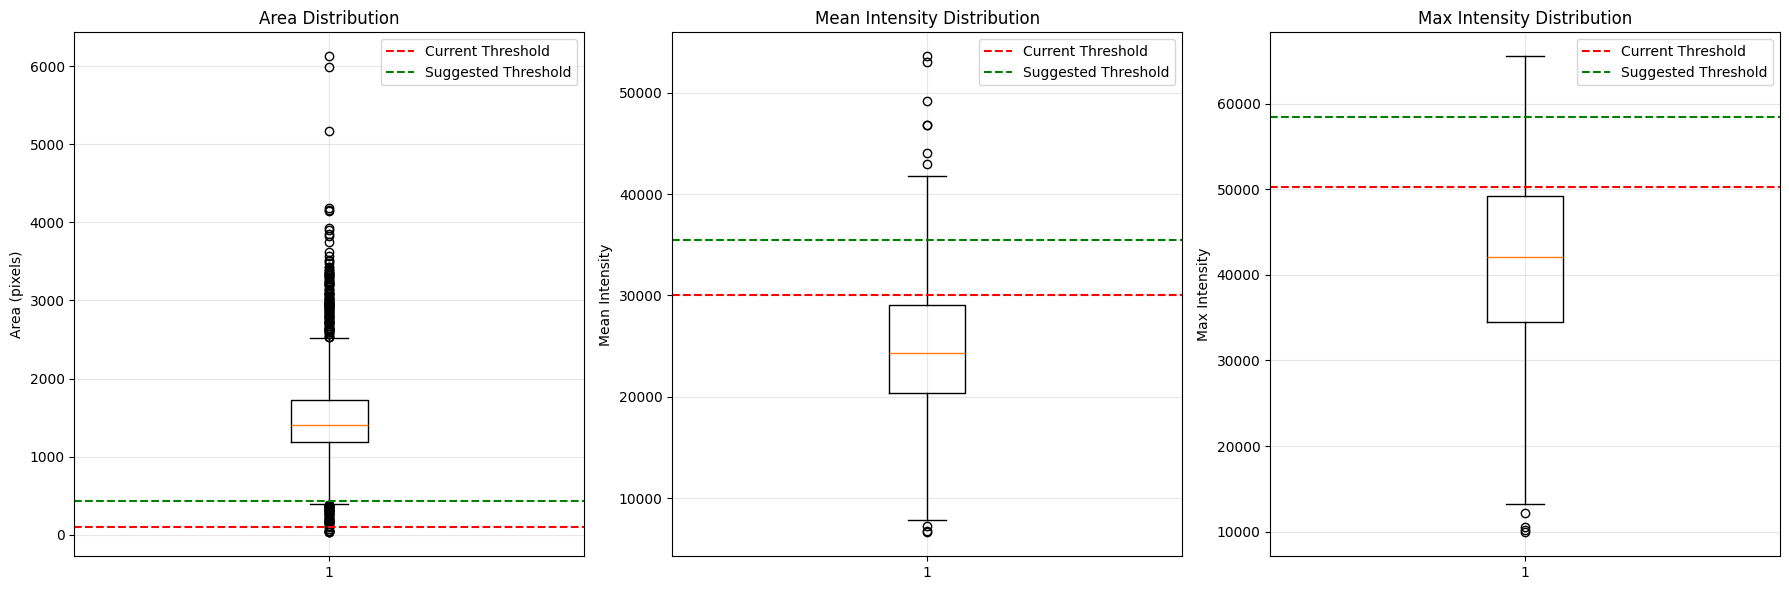


You can use the analyze_thresholds function to explore different threshold values.
Example usage:
analyze_thresholds(stats_df, max_intensity_threshold=55000, mean_intensity_threshold=35000, min_area_threshold=50)


In [10]:
import numpy as np
import tifffile
import os
import glob
from skimage import measure
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm  # For progress bar

# Define paths - using the same paths as in the original code
mask_dir = '/content/drive/MyDrive/knowledge/University/Master/Thesis/Segmented/1.4Pa-x40/Nuclei_raw'
original_img_dir = '/content/drive/MyDrive/knowledge/University/Master/Thesis/Projected/1.4Pa-x40/Nuclei/background'

# Create output directory for plots
plot_dir = 'feature_distribution_plots'
os.makedirs(plot_dir, exist_ok=True)

# Find all mask files
mask_files = glob.glob(os.path.join(mask_dir, '*_mask.tif'))
print(f"Found {len(mask_files)} mask files to analyze")

# Storage for collected statistics
all_stats = []

# Process each mask file
for mask_file in tqdm(mask_files, desc="Analyzing masks"):
    base_name = os.path.basename(mask_file).replace('_mask.tif', '')

    # Find corresponding original image for intensity measurements
    original_img_file = os.path.join(original_img_dir, f"{base_name}.tif")

    # Skip if original image not found
    if not os.path.exists(original_img_file):
        print(f"Warning: Could not find original image for {base_name}. Skipping.")
        continue

    # Load mask and original image
    mask = tifffile.imread(mask_file)
    original_img = tifffile.imread(original_img_file)

    # Get labeled regions
    regions = measure.regionprops(mask)

    # Process each object in the mask
    for region in regions:
        # Skip background (label 0)
        if region.label == 0:
            continue

        # Create a binary mask for this specific region
        object_mask = (mask == region.label)

        # Calculate area
        area = region.area

        # Calculate intensity statistics
        intensities = original_img[object_mask]
        mean_intensity = np.mean(intensities)
        max_intensity = np.max(intensities)

        # Store statistics
        all_stats.append({
            'file': base_name,
            'nucleus_id': region.label,
            'area': area,
            'mean_intensity': mean_intensity,
            'max_intensity': max_intensity
        })

# Convert to DataFrame
stats_df = pd.DataFrame(all_stats)

# Basic summary statistics
print("\nSummary Statistics:")
print(stats_df[['area', 'mean_intensity', 'max_intensity']].describe())

# Function to analyze impact of different threshold values
def analyze_thresholds(df, max_intensity_threshold, mean_intensity_threshold, min_area_threshold):
    max_intensity_removed = sum(df['max_intensity'] > max_intensity_threshold)
    mean_intensity_removed = sum(df['mean_intensity'] > mean_intensity_threshold)
    area_removed = sum(df['area'] < min_area_threshold)
    total = len(df)

    # Count nuclei that would be removed by at least one criterion
    total_removed = sum((df['max_intensity'] > max_intensity_threshold) |
                         (df['mean_intensity'] > mean_intensity_threshold) |
                         (df['area'] < min_area_threshold))

    print(f"\nThreshold Analysis:")
    print(f"Max Intensity > {max_intensity_threshold}: {max_intensity_removed} nuclei ({max_intensity_removed/total*100:.2f}% of total)")
    print(f"Mean Intensity > {mean_intensity_threshold}: {mean_intensity_removed} nuclei ({mean_intensity_removed/total*100:.2f}% of total)")
    print(f"Area < {min_area_threshold}: {area_removed} nuclei ({area_removed/total*100:.2f}% of total)")
    print(f"Total nuclei removed: {total_removed} ({total_removed/total*100:.2f}% of total)")

    return {
        'max_intensity_removed': max_intensity_removed,
        'mean_intensity_removed': mean_intensity_removed,
        'area_removed': area_removed,
        'total_removed': total_removed,
        'total': total
    }

# Function to suggest thresholds based on percentiles
def suggest_thresholds(df, area_percentile=5, mean_intensity_percentile=95, max_intensity_percentile=95):
    # For area, we want to remove small objects, so we use a low percentile
    suggested_min_area = df['area'].quantile(area_percentile/100)

    # For intensities, we want to remove bright objects, so we use a high percentile
    suggested_mean_intensity = df['mean_intensity'].quantile(mean_intensity_percentile/100)
    suggested_max_intensity = df['max_intensity'].quantile(max_intensity_percentile/100)

    print(f"\nSuggested Thresholds (based on percentiles):")
    print(f"MIN_AREA_THRESHOLD = {suggested_min_area:.0f} (removes bottom {area_percentile}% by area)")
    print(f"MEAN_INTENSITY_THRESHOLD = {suggested_mean_intensity:.0f} (removes top {100-mean_intensity_percentile}% by mean intensity)")
    print(f"MAX_INTENSITY_THRESHOLD = {suggested_max_intensity:.0f} (removes top {100-max_intensity_percentile}% by max intensity)")

    # Analyze the impact of these suggested thresholds
    print("\nImpact of suggested thresholds:")
    analyze_thresholds(df, suggested_max_intensity, suggested_mean_intensity, suggested_min_area)

    return {
        'MIN_AREA_THRESHOLD': int(suggested_min_area),
        'MEAN_INTENSITY_THRESHOLD': int(suggested_mean_intensity),
        'MAX_INTENSITY_THRESHOLD': int(suggested_max_intensity)
    }

# Analyze current thresholds
print("\nImpact of Current Thresholds:")
current_result = analyze_thresholds(stats_df, 50300, 30000, 100)

# Percentile analysis for threshold determination
print("\nPercentile Analysis (useful for setting thresholds):")
percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
percentile_stats = stats_df[['area', 'mean_intensity', 'max_intensity']].quantile(q=[p/100 for p in percentiles])
percentile_stats.index = [f"{p}%" for p in percentiles]
print(percentile_stats)

# Generate suggestions
print("\nGenerating suggested thresholds...")
suggested_thresholds = suggest_thresholds(stats_df)

# Save statistics to CSV
stats_df.to_csv(os.path.join(plot_dir, 'nucleus_statistics.csv'), index=False)
print(f"\nDetailed statistics saved to {os.path.join(plot_dir, 'nucleus_statistics.csv')}")

# VISUALIZATIONS

# 1. Regular histograms
plt.figure(figsize=(18, 6))

# Histogram of areas
plt.subplot(1, 3, 1)
plt.hist(stats_df['area'], bins=50, alpha=0.75)
plt.axvline(x=100, color='r', linestyle='--', label=f'Current: 100')
plt.axvline(x=suggested_thresholds['MIN_AREA_THRESHOLD'], color='g', linestyle='--',
           label=f'Suggested: {suggested_thresholds["MIN_AREA_THRESHOLD"]}')
plt.title('Nucleus Area Distribution')
plt.xlabel('Area (pixels)')
plt.ylabel('Count')
plt.legend()

# Histogram of mean intensities
plt.subplot(1, 3, 2)
plt.hist(stats_df['mean_intensity'], bins=50, alpha=0.75)
plt.axvline(x=30000, color='r', linestyle='--', label=f'Current: 30000')
plt.axvline(x=suggested_thresholds['MEAN_INTENSITY_THRESHOLD'], color='g', linestyle='--',
           label=f'Suggested: {suggested_thresholds["MEAN_INTENSITY_THRESHOLD"]}')
plt.title('Mean Intensity Distribution')
plt.xlabel('Mean Intensity')
plt.ylabel('Count')
plt.legend()

# Histogram of max intensities
plt.subplot(1, 3, 3)
plt.hist(stats_df['max_intensity'], bins=50, alpha=0.75)
plt.axvline(x=50300, color='r', linestyle='--', label=f'Current: 50300')
plt.axvline(x=suggested_thresholds['MAX_INTENSITY_THRESHOLD'], color='g', linestyle='--',
           label=f'Suggested: {suggested_thresholds["MAX_INTENSITY_THRESHOLD"]}')
plt.title('Maximum Intensity Distribution')
plt.xlabel('Maximum Intensity')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'nucleus_feature_distributions.png'), dpi=300)
plt.show()

# 2. Log-scale histograms for better visualization of skewed distributions
plt.figure(figsize=(18, 6))

# Histogram of areas (log scale)
plt.subplot(1, 3, 1)
plt.hist(stats_df['area'], bins=50, alpha=0.75, log=True)
plt.axvline(x=100, color='r', linestyle='--', label=f'Current: 100')
plt.axvline(x=suggested_thresholds['MIN_AREA_THRESHOLD'], color='g', linestyle='--',
           label=f'Suggested: {suggested_thresholds["MIN_AREA_THRESHOLD"]}')
plt.title('Nucleus Area Distribution (Log Scale)')
plt.xlabel('Area (pixels)')
plt.ylabel('Count (log)')
plt.legend()

# Histogram of mean intensities (log scale)
plt.subplot(1, 3, 2)
plt.hist(stats_df['mean_intensity'], bins=50, alpha=0.75, log=True)
plt.axvline(x=30000, color='r', linestyle='--', label=f'Current: 30000')
plt.axvline(x=suggested_thresholds['MEAN_INTENSITY_THRESHOLD'], color='g', linestyle='--',
           label=f'Suggested: {suggested_thresholds["MEAN_INTENSITY_THRESHOLD"]}')
plt.title('Mean Intensity Distribution (Log Scale)')
plt.xlabel('Mean Intensity')
plt.ylabel('Count (log)')
plt.legend()

# Histogram of max intensities (log scale)
plt.subplot(1, 3, 3)
plt.hist(stats_df['max_intensity'], bins=50, alpha=0.75, log=True)
plt.axvline(x=50300, color='r', linestyle='--', label=f'Current: 50300')
plt.axvline(x=suggested_thresholds['MAX_INTENSITY_THRESHOLD'], color='g', linestyle='--',
           label=f'Suggested: {suggested_thresholds["MAX_INTENSITY_THRESHOLD"]}')
plt.title('Maximum Intensity Distribution (Log Scale)')
plt.xlabel('Maximum Intensity')
plt.ylabel('Count (log)')
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'nucleus_feature_distributions_log.png'), dpi=300)
plt.show()

# 3. Scatter plots to see relationships between features
plt.figure(figsize=(18, 6))

# Area vs Mean Intensity
plt.subplot(1, 3, 1)
plt.scatter(stats_df['area'], stats_df['mean_intensity'], alpha=0.5, s=3)
plt.axhline(y=30000, color='r', linestyle='--', label='Current Mean Int')
plt.axhline(y=suggested_thresholds['MEAN_INTENSITY_THRESHOLD'], color='g', linestyle='--', label='Suggested Mean Int')
plt.axvline(x=100, color='r', linestyle=':', label='Current Area')
plt.axvline(x=suggested_thresholds['MIN_AREA_THRESHOLD'], color='g', linestyle=':', label='Suggested Area')
plt.title('Area vs Mean Intensity')
plt.xlabel('Area (pixels)')
plt.ylabel('Mean Intensity')
plt.legend()

# Area vs Max Intensity
plt.subplot(1, 3, 2)
plt.scatter(stats_df['area'], stats_df['max_intensity'], alpha=0.5, s=3)
plt.axhline(y=50300, color='r', linestyle='--', label='Current Max Int')
plt.axhline(y=suggested_thresholds['MAX_INTENSITY_THRESHOLD'], color='g', linestyle='--', label='Suggested Max Int')
plt.axvline(x=100, color='r', linestyle=':', label='Current Area')
plt.axvline(x=suggested_thresholds['MIN_AREA_THRESHOLD'], color='g', linestyle=':', label='Suggested Area')
plt.title('Area vs Max Intensity')
plt.xlabel('Area (pixels)')
plt.ylabel('Max Intensity')
plt.legend()

# Mean Intensity vs Max Intensity
plt.subplot(1, 3, 3)
plt.scatter(stats_df['mean_intensity'], stats_df['max_intensity'], alpha=0.5, s=3)
plt.axhline(y=50300, color='r', linestyle='--', label='Current Max Int')
plt.axhline(y=suggested_thresholds['MAX_INTENSITY_THRESHOLD'], color='g', linestyle='--', label='Suggested Max Int')
plt.axvline(x=30000, color='r', linestyle=':', label='Current Mean Int')
plt.axvline(x=suggested_thresholds['MEAN_INTENSITY_THRESHOLD'], color='g', linestyle=':', label='Suggested Mean Int')
plt.title('Mean Intensity vs Max Intensity')
plt.xlabel('Mean Intensity')
plt.ylabel('Max Intensity')
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'nucleus_feature_relationships.png'), dpi=300)
plt.show()

# 4. Box plots to identify outliers
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.boxplot(stats_df['area'])
plt.axhline(y=100, color='r', linestyle='--', label='Current Threshold')
plt.axhline(y=suggested_thresholds['MIN_AREA_THRESHOLD'], color='g', linestyle='--', label='Suggested Threshold')
plt.title('Area Distribution')
plt.ylabel('Area (pixels)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1, 3, 2)
plt.boxplot(stats_df['mean_intensity'])
plt.axhline(y=30000, color='r', linestyle='--', label='Current Threshold')
plt.axhline(y=suggested_thresholds['MEAN_INTENSITY_THRESHOLD'], color='g', linestyle='--', label='Suggested Threshold')
plt.title('Mean Intensity Distribution')
plt.ylabel('Mean Intensity')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1, 3, 3)
plt.boxplot(stats_df['max_intensity'])
plt.axhline(y=50300, color='r', linestyle='--', label='Current Threshold')
plt.axhline(y=suggested_thresholds['MAX_INTENSITY_THRESHOLD'], color='g', linestyle='--', label='Suggested Threshold')
plt.title('Max Intensity Distribution')
plt.ylabel('Max Intensity')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'nucleus_feature_boxplots.png'), dpi=300)
plt.show()

# Interactive threshold exploration
print("\nYou can use the analyze_thresholds function to explore different threshold values.")
print("Example usage:")
print("analyze_thresholds(stats_df, max_intensity_threshold=55000, mean_intensity_threshold=35000, min_area_threshold=50)")